# Prostate Cancer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from matplotlib.ticker import FormatStrFormatter
from ml_datasets.esl import ProstateCancer

In [2]:
prostate_cancer = ProstateCancer(verbose=0)
df = prostate_cancer.load()
print(prostate_cancer.info)

7.17kiB [00:00, 1.16MiB/s]
1.02kiB [00:00, 183kiB/s]Prostate data info

Predictors (columns 1--8)

lcavol
lweight
age
lbph
svi
lcp
gleason
pgg45

outcome (column 9)

lpsa

train/test indicator (column 10)

This last column indicates which 67 observations were used as the 
"training set" and which 30 as the test set, as described on page 48
in the book.

There was an error in these data in the first edition of this
book. Subject 32 had a value of 6.1 for lweight, which translates to a
449 gm prostate! The correct value is 44.9 gm. We are grateful to
Prof. Stephen W. Link for alerting us to this error.

The features must first be scaled to have mean zero and  variance 96 (=n)
before the analyses in Tables 3.1 and beyond.  That is, if x is the  96 by 8 matrix
of features, we compute xp <- scale(x,TRUE,TRUE)





In [3]:
def format_scatter_plot(axes):
    # iterate through all the subplots
    for i, label in enumerate(column_reordered):
        for j, _ in enumerate(column_reordered):
            if i == j:
                # clear the subplot diagonal and annotate it with label
                axes[i,i].clear()
                axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=15)
            ax = axes[i, j]
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)
            ax.set_ylabel('')
            ax.set_xlabel('')
            ax.yaxis.label.set_rotation(90)

            if ax.is_first_col():
                ax.yaxis.set_ticks_position('left')
                plt.sca(ax)
                plt.yticks(rotation=90)

            if ax.is_last_col():
                ax.yaxis.set_ticks_position('right')
                plt.sca(ax)
                plt.yticks(rotation=90)
                if ax.is_last_row():
                    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

            if ax.is_first_row():
                ax.xaxis.set_ticks_position('top')

            if ax.is_last_row():
                ax.xaxis.set_ticks_position('bottom')
                plt.sca(ax)
                plt.xticks(rotation=0)

    for i, j in zip(range(len(column_reordered)), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

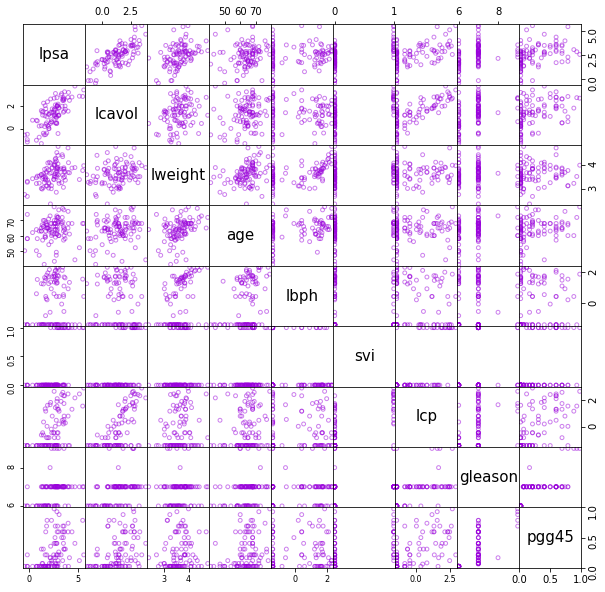

In [4]:
# reordering columns to have identical result as the one in the book
column_reordered = ['lpsa'] + prostate_cancer.meta[:-1]

# plot scatter matrix
axes = pd.plotting.scatter_matrix(df[column_reordered], figsize=(10, 10), marker='o', facecolors="none", edgecolors='#9A03DB', s=15)

# plot formatting
format_scatter_plot(axes)
plt.show()